# Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

# Load data

In [2]:
# Read in the weather data csv
df = pd.read_csv('data/sydney_weather.csv', parse_dates=['Date'])
df

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-02-01,19.5,22.4,20.95,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9
1,2008-02-02,19.5,25.6,22.55,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8
2,2008-02-03,21.6,24.5,23.05,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0
3,2008-02-04,20.2,22.8,21.50,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9
4,2008-02-05,19.7,25.7,22.70,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3339,2017-06-21,8.6,19.6,14.10,0.0,7.8,73.0,52.0,1025.9,1025.3,10.5,17.9
3340,2017-06-22,9.3,19.2,14.25,0.0,9.2,78.0,53.0,1028.5,1024.6,11.0,18.7
3341,2017-06-23,9.4,17.7,13.55,0.0,2.7,85.0,56.0,1020.8,1015.0,10.2,17.3
3342,2017-06-24,10.1,19.3,14.70,0.0,9.3,56.0,35.0,1017.3,1015.1,12.4,19.0


## Date and time features

Add date and time features (columns) such as year, month, day, season, day of the week, etc.

Example:

In [3]:
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Day_of_year'] = df['Date'].dt.dayofyear
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter
df.head()

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day_of_week,Day_of_year,Year,Month,Season
0,2008-02-01,19.5,22.4,20.95,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,4,32,2008,2,1
1,2008-02-02,19.5,25.6,22.55,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,5,33,2008,2,1
2,2008-02-03,21.6,24.5,23.05,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,6,34,2008,2,1
3,2008-02-04,20.2,22.8,21.50,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,0,35,2008,2,1
4,2008-02-05,19.7,25.7,22.70,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1,36,2008,2,1


## Lag features

Add columns that correspond to the values from the previous N days (one column for each previous day).

You can decide which N you think is better or train multiple models with different datasets with different values of N to see which one gives the best performance.

Use the `shift` function in pandas for moving the values down. Example:

In [4]:
for col in ['MinTemp', 'MaxTemp', 'MedTemp', 'Rainfall', 'Sunshine', 'Humidity3pm', 'Pressure3pm']:
    for i in range(1, 5):
        # lagged values
        df[f'{col}_lag_{i}'] = df[col].shift(i)
df.head()

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Sunshine_lag_3,Sunshine_lag_4,Humidity3pm_lag_1,Humidity3pm_lag_2,Humidity3pm_lag_3,Humidity3pm_lag_4,Pressure3pm_lag_1,Pressure3pm_lag_2,Pressure3pm_lag_3,Pressure3pm_lag_4
0,2008-02-01,19.5,22.4,20.95,15.6,0.0,92.0,84.0,1017.6,1017.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-02-02,19.5,25.6,22.55,6.0,2.7,83.0,73.0,1017.9,1016.4,...,NaN,NaN,84.0,NaN,NaN,NaN,1017.4,NaN,NaN,NaN
2,2008-02-03,21.6,24.5,23.05,6.6,0.1,88.0,86.0,1016.7,1015.6,...,NaN,NaN,73.0,84.0,NaN,NaN,1016.4,1017.4,NaN,NaN
3,2008-02-04,20.2,22.8,21.50,18.8,0.0,83.0,90.0,1014.2,1011.8,...,0.0,NaN,86.0,73.0,84.0,NaN,1015.6,1016.4,1017.4,NaN
4,2008-02-05,19.7,25.7,22.70,77.4,0.0,88.0,74.0,1008.3,1004.8,...,2.7,0.0,90.0,86.0,73.0,84.0,1011.8,1015.6,1016.4,1017.4


## Rolling features

Calculate "summarized features" of the last N days (e.g., 3 days).

In [5]:
for col in ['MinTemp', 'MaxTemp', 'MedTemp', 'Rainfall', 'Sunshine', 'Humidity3pm', 'Pressure3pm']:
    for i in [3, 5, 10, 15]:
        # rolling windows of `i` days
        df[f'{col}_rolling_avg_{i}'] = df[col].rolling(i, min_periods=i).mean()
        df[f'{col}_rolling_std_{i}'] = df[col].rolling(i, min_periods=i).std()
df.head()

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Humidity3pm_rolling_avg_15,Humidity3pm_rolling_std_15,Pressure3pm_rolling_avg_3,Pressure3pm_rolling_std_3,Pressure3pm_rolling_avg_5,Pressure3pm_rolling_std_5,Pressure3pm_rolling_avg_10,Pressure3pm_rolling_std_10,Pressure3pm_rolling_avg_15,Pressure3pm_rolling_std_15
0,2008-02-01,19.5,22.4,20.95,15.6,0.0,92.0,84.0,1017.6,1017.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-02-02,19.5,25.6,22.55,6.0,2.7,83.0,73.0,1017.9,1016.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-02-03,21.6,24.5,23.05,6.6,0.1,88.0,86.0,1016.7,1015.6,...,NaN,NaN,1016.466667,0.901850,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-02-04,20.2,22.8,21.50,18.8,0.0,83.0,90.0,1014.2,1011.8,...,NaN,NaN,1014.600000,2.457641,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-02-05,19.7,25.7,22.70,77.4,0.0,88.0,74.0,1008.3,1004.8,...,NaN,NaN,1010.733333,5.478443,1013.2,5.151699,NaN,NaN,NaN,NaN


## Target

Compute the target value we want to predict with a prediction window of 1 day.

Feel free to try other prediction windows, e.g. forecasting 2, 3 or 7 days. Further predictions should have worse results, as the current temperature values are less informative of the far future.

In [6]:
df['target'] = df['MedTemp'].shift(-1).values
df.tail()

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Humidity3pm_rolling_std_15,Pressure3pm_rolling_avg_3,Pressure3pm_rolling_std_3,Pressure3pm_rolling_avg_5,Pressure3pm_rolling_std_5,Pressure3pm_rolling_avg_10,Pressure3pm_rolling_std_10,Pressure3pm_rolling_avg_15,Pressure3pm_rolling_std_15,target
3339,2017-06-21,8.6,19.6,14.10,0.0,7.8,73.0,52.0,1025.9,1025.3,...,10.056981,1026.300000,1.819341,1025.30,2.351595,1025.59,2.382086,1025.446667,2.853786,14.25
3340,2017-06-22,9.3,19.2,14.25,0.0,9.2,78.0,53.0,1028.5,1024.6,...,9.811558,1025.033333,0.378594,1025.86,1.482565,1025.65,2.344853,1025.780000,2.373725,13.55
3341,2017-06-23,9.4,17.7,13.55,0.0,2.7,85.0,56.0,1020.8,1015.0,...,8.944272,1021.633333,5.755287,1023.70,5.084290,1024.24,3.816980,1025.220000,3.632433,14.70
3342,2017-06-24,10.1,19.3,14.70,0.0,9.3,56.0,35.0,1017.3,1015.1,...,11.841010,1018.233333,5.513922,1021.04,5.474760,1022.91,4.468022,1024.446667,4.439895,13.45
3343,2017-06-25,7.6,19.3,13.45,0.0,9.4,73.0,32.0,1018.6,1015.4,...,14.100996,1015.166667,0.208167,1019.08,5.366284,1022.01,5.008315,1023.460000,4.706500,NaN


## Clean NaNs

Drop the NaNs that have appeared during the feature engineering process.

In [7]:
df = df.dropna()
df.shape

(3329, 102)

# Cross-validation

In [8]:
def custom_cv_ts(df, models, X, y, cv):
    """
    Perform time series cross-validation with a given model, X, y, and cv object.
    """
    # Create empty train and test MAE lists
    train_maes = []
    val_maes = []

    # Cross-validation
    for i, (train_index, val_index) in enumerate(cv.split(X)):
        # Train and val data in this split
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_val, y_val = X.iloc[val_index], y.iloc[val_index]

        # Nested train and validation data from previous train data
        X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.1,
                                                              random_state=42, shuffle=False)
        
        # Calculate validation metrics after training each model
        metrics = []
        for mod in models:
            mod.fit(X_train2, y_train2)
            y_pred_val2 = mod.predict(X_val2)
            metrics.append( mean_absolute_error(y_val2, y_pred_val2) )
            
        # Select the best model based on validation MAE and retrain it with the whole training data
        best_model_idx = np.argmin(metrics)
        best_model = models[best_model_idx]
        best_params = None
        best_model_str = type(best_model)
        if isinstance(best_model, RandomizedSearchCV) or \
           isinstance(best_model, GridSearchCV):
            best_params = best_model.best_params_
            if isinstance(best_model.best_estimator_, Pipeline):
                # Assuming the model is the 2nd element of the pipeline...
                best_model_str = type(best_model.best_estimator_[1])
            else:
                best_model_str = type(best_model.best_estimator_)
            print('Best validation model:', best_model_idx, f'({best_model_str})')
        if best_params is not None:
            print('Best params:', best_params)
        best_model.fit(X_train, y_train)
        
        # Predict and compute MAEs of the train and val sets
        y_pred_train = best_model.predict(X_train)
        y_pred_val = best_model.predict(X_val)
        train_maes.append( mean_absolute_error(y_train, y_pred_train) )
        val_maes.append( mean_absolute_error(y_val, y_pred_val) )
                                    
        # Show info
        dates = df.loc[X.index, 'Date']
        print('Train dates:', dates.iloc[train_index].min().date(), '-', dates.iloc[train_index].max().date())
        print('Train MAE:', round(train_maes[-1], 2))
        print('Validation dates:', dates.iloc[val_index].min().date(), '-', dates.iloc[val_index].max().date())
        print('Validation MAE:', round(val_maes[-1], 2))
        print()

    return np.array(train_maes), np.array(val_maes)

In [9]:
X = df.drop(['Date', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## ML

In [10]:
# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=10, test_size=7)

### Baseline

In [11]:
class BLModel():
    """
    Baseline model that predicts the current's day med temp.
    """
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return X['MedTemp'].values

In [12]:
# Models to try in each cross-validation split
models = [
    BLModel(),
]

train_maes, valid_maes = custom_cv_ts(df, models, X_train, y_train, cv=tscv)

Best validation model: 0 (<class '__main__.BLModel'>)
Train dates: 2008-02-15 - 2015-06-19
Train MAE: 1.57
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 1.16

Best validation model: 0 (<class '__main__.BLModel'>)
Train dates: 2008-02-15 - 2015-06-26
Train MAE: 1.57
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 0.69

Best validation model: 0 (<class '__main__.BLModel'>)
Train dates: 2008-02-15 - 2015-07-03
Train MAE: 1.57
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.66

Best validation model: 0 (<class '__main__.BLModel'>)
Train dates: 2008-02-15 - 2015-07-10
Train MAE: 1.57
Validation dates: 2015-07-11 - 2015-07-17
Validation MAE: 1.05

Best validation model: 0 (<class '__main__.BLModel'>)
Train dates: 2008-02-15 - 2015-07-17
Train MAE: 1.57
Validation dates: 2015-07-18 - 2015-07-24
Validation MAE: 0.84

Best validation model: 0 (<class '__main__.BLModel'>)
Train dates: 2008-02-15 - 2015-07-24
Train MAE: 1.56
Validation dates: 2015-07-25 - 2015-07

In [13]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')

Mean train MAE: 1.57 ºC
Mean validation MAE: 1.2 ºC


### Models

In [5]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import ShuffleSplit

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
cv2 = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

# KNN
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_jobs=-1))
])
knn_params = {
    'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'knn__n_neighbors': np.arange(1, 10),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': np.arange(1, 4)
}
knn_rs = RandomizedSearchCV(knn, knn_params, n_iter=50,
                            scoring='neg_mean_absolute_error',
                            cv=cv2, verbose=0, n_jobs=-1)

# RF
rf = RandomForestRegressor(n_jobs=-1)
rf_params = {
    'n_estimators': np.arange(10, 30, 5),
    'max_depth': np.arange(5, 31, 2),
    'min_samples_split': np.arange(2, 22, 2),
    'min_samples_leaf': np.arange(1, 21),
}
rf_rs = RandomizedSearchCV(rf, rf_params, n_iter=50,
                           scoring='neg_mean_absolute_error',
                           cv=cv2, verbose=0, n_jobs=-1)

# LR
lr = LinearRegression()

# ElasticNet
en = Pipeline([
    ('scaler', None),
    ('en', ElasticNet(max_iter=10_000))
])
en_params = {
    'scaler': [MinMaxScaler(), RobustScaler(), StandardScaler()],
    'en__alpha': [0.001, 0.01, 0.1, 1, 10],
    'en__l1_ratio': np.arange(0, 1.01, 0.05),
}
en_rs = RandomizedSearchCV(en, en_params, n_iter=50,
                           scoring='neg_mean_absolute_error',
                           cv=cv2, verbose=0, n_jobs=-1)

# NN
def build_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Normalization(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(24, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(0.0001), loss='mae')
    return model

es = EarlyStopping(patience=5, restore_best_weights=True)
nn = KerasRegressor(
    model=build_model,
    validation_split=0.2,
    epochs=50,
    callbacks=[es],
    verbose=0
)

In [31]:
# Models to try in each cross-validation split
models = [
    knn_rs,
    rf_rs,
    lr,
    en_rs,
    nn,
]

train_maes, valid_maes = custom_cv_ts(df, models, X_train, y_train, cv=tscv)

Best validation model: 3 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'scaler': RobustScaler(), 'en__l1_ratio': 0.8500000000000001, 'en__alpha': 0.01}
Train dates: 2008-02-15 - 2015-06-19
Train MAE: 1.25
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 1.12

Best validation model: 3 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'scaler': RobustScaler(), 'en__l1_ratio': 0.9500000000000001, 'en__alpha': 0.01}
Train dates: 2008-02-15 - 2015-06-26
Train MAE: 1.24
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 1.09

Best validation model: 3 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'scaler': StandardScaler(), 'en__l1_ratio': 1.0, 'en__alpha': 0.01}
Train dates: 2008-02-15 - 2015-07-03
Train MAE: 1.25
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.57

Best validation model: 3 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'scaler

In [32]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')

Mean train MAE: 1.25 ºC
Mean validation MAE: 1.12 ºC


### Feature importances

The previous day's median temperature is the most important by far!

It's no surprise then that EN performs as well as it does: it "eliminates" the unimportant features and considers a linear prediction.

In [21]:
rf = RandomForestRegressor(max_depth=20, n_jobs=-1)
# Take only the first half of the training data because we don't want to overfit
half = int(len(X_train)/2)
rf.fit(X_train.iloc[:half], y_train.iloc[:half])

pd.DataFrame({
    'feature': X_train.iloc[:half].columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

,feature,importance
2,MedTemp,0.654940
9,Temp9am,0.094950
10,Temp3pm,0.021036
0,MinTemp,0.015379
6,Humidity3pm,0.012198
66,MedTemp_rolling_avg_15,0.011198
12,Day_of_year,0.008262
1,MaxTemp,0.006528
7,Pressure9am,0.006099
44,MinTemp_rolling_avg_3,0.006008


### Pure ElasticNet

In [15]:
# ElasticNet
en = Pipeline([
    ('scaler', None),
    ('en', ElasticNet(max_iter=10_000))
])
en_params = {
    'scaler': [MinMaxScaler(), RobustScaler(), StandardScaler()],
    'en__alpha': np.arange(0.001, 0.01, 0.001),
    'en__l1_ratio': np.append(np.arange(0.8, 0.99, 0.02), [1.]), # use 1. because of Python's rounding problems
}
en_gs = GridSearchCV(en, en_params,
                     scoring='neg_mean_absolute_error',
                     cv=cv2, verbose=0, n_jobs=-1)

In [48]:
# Models to try in each cross-validation split
models = [
    en_gs,
]

train_maes, valid_maes = custom_cv_ts(df, models, X_train, y_train, cv=tscv)

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.009000000000000001, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2008-02-15 - 2015-06-19
Train MAE: 1.25
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 1.05

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.007, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2008-02-15 - 2015-06-26
Train MAE: 1.24
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 1.0

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.008, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2008-02-15 - 2015-07-03
Train MAE: 1.24
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.61

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.0090000

In [53]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')
print('Median validation MAE:', np.median(valid_maes).round(2), 'ºC')

Mean train MAE: 1.25 ºC
Mean validation MAE: 1.12 ºC
Median validation MAE: 1.03 ºC


### Set `max_train_size`

It seems we get better predictions if just taking the last year of training data instead of the whole history.

In [54]:
# Use previous years' data as training data
tscv = TimeSeriesSplit(n_splits=10, test_size=7, max_train_size=365*2)

In [55]:
# Models to try in each cross-validation split
models = [
    en_gs,
]

train_maes, valid_maes = custom_cv_ts(df, models, X_train, y_train, cv=tscv)

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.009000000000000001, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2013-06-20 - 2015-06-19
Train MAE: 1.2
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 1.21

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.009000000000000001, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2013-06-27 - 2015-06-26
Train MAE: 1.23
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 0.98

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.008, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2013-07-04 - 2015-07-03
Train MAE: 1.23
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.61

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__al

In [57]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')
print('Median validation MAE:', np.median(valid_maes).round(2), 'ºC')

Mean train MAE: 1.2 ºC
Mean validation MAE: 1.15 ºC
Median validation MAE: 1.13 ºC


## RNNs

#### Prepare data

In [16]:
# Read in the weather data csv
df_raw = pd.read_csv('data/sydney_weather.csv', parse_dates=['Date'])
df_raw

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-02-01,19.5,22.4,20.95,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9
1,2008-02-02,19.5,25.6,22.55,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8
2,2008-02-03,21.6,24.5,23.05,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0
3,2008-02-04,20.2,22.8,21.50,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9
4,2008-02-05,19.7,25.7,22.70,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3339,2017-06-21,8.6,19.6,14.10,0.0,7.8,73.0,52.0,1025.9,1025.3,10.5,17.9
3340,2017-06-22,9.3,19.2,14.25,0.0,9.2,78.0,53.0,1028.5,1024.6,11.0,18.7
3341,2017-06-23,9.4,17.7,13.55,0.0,2.7,85.0,56.0,1020.8,1015.0,10.2,17.3
3342,2017-06-24,10.1,19.3,14.70,0.0,9.3,56.0,35.0,1017.3,1015.1,12.4,19.0


It is OK to add date-related features:

In [17]:
df_raw['Day_of_week'] = df_raw['Date'].dt.dayofweek
df_raw['Day_of_year'] = df_raw['Date'].dt.dayofyear
df_raw['Year'] = df_raw['Date'].dt.year
df_raw['Month'] = df_raw['Date'].dt.month
df_raw['Season'] = df_raw['Date'].dt.quarter
df_raw.head()

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day_of_week,Day_of_year,Year,Month,Season
0,2008-02-01,19.5,22.4,20.95,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,4,32,2008,2,1
1,2008-02-02,19.5,25.6,22.55,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,5,33,2008,2,1
2,2008-02-03,21.6,24.5,23.05,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,6,34,2008,2,1
3,2008-02-04,20.2,22.8,21.50,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,0,35,2008,2,1
4,2008-02-05,19.7,25.7,22.70,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1,36,2008,2,1


For a fair comparison, set the same length as the `df` (we removed nulls from this one, so it shrinked).

In [50]:
df_raw = df_raw[(df_raw['Date'] >= df['Date'].min()) & (df_raw['Date'] <= df['Date'].max())].copy()

In [51]:
df_raw['target'] = df_raw['MedTemp'].shift(-1).values
df_raw.dropna(inplace=True)
df_raw.tail()

,Date,MinTemp,MaxTemp,MedTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day_of_week,Day_of_year,Year,Month,Season,target
3336,2017-06-18,11.3,18.0,14.65,1.8,6.3,83.0,62.0,1025.7,1025.8,12.9,17.6,6,169,2017,6,2,14.75
3337,2017-06-19,11.2,18.3,14.75,0.4,1.9,79.0,69.0,1030.4,1028.4,12.7,17.2,0,170,2017,6,2,15.65
3338,2017-06-20,11.3,20.0,15.65,4.4,5.8,88.0,60.0,1028.7,1025.2,11.9,19.7,1,171,2017,6,2,14.10
3339,2017-06-21,8.6,19.6,14.10,0.0,7.8,73.0,52.0,1025.9,1025.3,10.5,17.9,2,172,2017,6,2,14.25
3340,2017-06-22,9.3,19.2,14.25,0.0,9.2,78.0,53.0,1028.5,1024.6,11.0,18.7,3,173,2017,6,2,13.55


In [52]:
X_raw = df_raw.drop(['Date', 'target'], axis=1)
y_raw = df_raw['target']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, shuffle=False)

In [53]:
# 1 ft only
# X_raw = df[['MedTemp']]
X_raw = df[['MedTemp', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']]
y_raw = df['target']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, shuffle=False)

In [22]:
def create_data_for_rnns(X, y, look_back=7):
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        # Take sequence of length `look_back`
        seqX = X.iloc[i:(i + look_back)].values
        seqY = y.iloc[i:(i + look_back)].values
        dataX.append(seqX)
        dataY.append(seqY)
    return np.array(dataX), np.array(dataY)

In [23]:
X_train_raw.head()

,MedTemp,MinTemp,MaxTemp,Humidity9am,Humidity3pm
14,21.35,18.3,24.4,80.0,56.0
15,20.40,16.7,24.1,77.0,52.0
16,22.15,19.5,24.8,63.0,62.0
17,21.95,18.6,25.3,70.0,59.0
18,21.90,19.0,24.8,79.0,65.0


In [24]:
X_train_rnn, y_train_rnn = create_data_for_rnns(X_train_raw, y_train_raw, look_back=3)      ## look_back para mirar 3 dias anteriores, cambiando el numero cambia, en las recurrentes
# Add correction for making it the same size as X_train_raw                                 ## siempre tienes que modificar los datos para hacerlos 3D                
# in this way, the CV will be applied in the exact same days as before
X_train_rnn = np.concatenate((X_train_rnn, np.zeros((3, 3, 5))), axis=0)
y_train_rnn = np.concatenate((y_train_rnn, np.zeros((3, 3))), axis=0)
pd.DataFrame(X_train_rnn[1], columns=X_train_raw.columns)

,MedTemp,MinTemp,MaxTemp,Humidity9am,Humidity3pm
0,20.40,16.7,24.1,77.0,52.0
1,22.15,19.5,24.8,63.0,62.0
2,21.95,18.6,25.3,70.0,59.0


In [25]:
X_train_rnn.shape

(2663, 3, 5)

In [26]:
from tensorflow.keras.layers import Normalization, SimpleRNN, LSTM, GRU

### Adapt TS CV function

In [27]:
# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=10, test_size=7)

In [43]:
def custom_cv_ts_rnn(df, models, X, y, cv, fit_hyperparams={}, dates=None):
    """
    Perform time series cross-validation with a given model, X, y, and cv object.
    """
    # Create empty train and test MAE lists
    train_maes = []
    val_maes = []

    # Cross-validation
    for i, (train_index, val_index) in enumerate(cv.split(X)):
        # Train and val data in this split
        X_train, y_train = X[train_index], y[train_index]
        X_val, y_val = X[val_index], y[val_index]
        
        # Calculate validation metrics after training each model
        best_model_idx = 0
        if len(models) > 1:
            # Nested train and validation data from previous train data
            X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.1,
                                                                random_state=42, shuffle=False)
            metrics = []
            for mod in models:
                mod.fit(X_train2, y_train2, **fit_hyperparams)
                metrics.append( mod.evaluate(X_val2, y_val2, verbose=0) )
            # Select the best model based on validation MAE and retrain it with the whole training data
            best_model_idx = np.argmin(metrics)
        
        best_model = models[best_model_idx]
        best_model.fit(X_train, y_train, **fit_hyperparams)
        
        # Predict and compute MAEs of the train and val sets
        train_maes.append( best_model.evaluate(X_train, y_train, verbose=0) )
        val_maes.append( best_model.evaluate(X_val, y_val, verbose=0) )
                                    
        # Show info
        if dates is not None:
            print('Best validation model:', best_model_idx)
            print('Train dates:', dates.iloc[train_index].min().date(), '-', dates.iloc[train_index].max().date())
            print('Train MAE:', round(train_maes[-1], 2))
            print('Validation dates:', dates.iloc[val_index].min().date(), '-', dates.iloc[val_index].max().date())
            print('Validation MAE:', round(val_maes[-1], 2))
            print()

    return np.array(train_maes), np.array(val_maes)

In [44]:
dates = df.loc[X_train_raw.index, 'Date']

### Simple

In [30]:
rnn = Sequential([
    Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Normalization(),
    SimpleRNN(64, activation='tanh', return_sequences=True),
    SimpleRNN(64, activation='tanh', return_sequences=False),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
rnn.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')
es = EarlyStopping(patience=15, monitor='loss', restore_best_weights=True)

In [45]:
# Models to try in each cross-validation split
models = [rnn]
fit_hyperparams = {
    'epochs': 500,
    'batch_size': 128,
    'validation_split': 0.25,
    'callbacks': [es],
    'verbose': 0,
}

train_maes, valid_maes = custom_cv_ts_rnn(df_raw, models, X_train_rnn, y_train_rnn, cv=tscv,
                                          fit_hyperparams=fit_hyperparams, dates=dates)

Best validation model: 0
Train dates: 2008-02-15 - 2015-06-19
Train MAE: 1.04
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 0.69

Best validation model: 0
Train dates: 2008-02-15 - 2015-06-26
Train MAE: 1.03
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 0.66

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-03
Train MAE: 1.03
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.8

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-10
Train MAE: 1.03
Validation dates: 2015-07-11 - 2015-07-17
Validation MAE: 0.88

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-17
Train MAE: 1.02
Validation dates: 2015-07-18 - 2015-07-24
Validation MAE: 0.65

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-24
Train MAE: 1.02
Validation dates: 2015-07-25 - 2015-07-31
Validation MAE: 1.22

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-31
Train MAE: 1.02
Validation dates: 2015-08-01 - 2015-08-07
Validation MAE: 1.18

Best va

In [46]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')
print('Median validation MAE:', np.median(valid_maes).round(2), 'ºC')

Mean train MAE: 1.02 ºC
Mean validation MAE: 0.85 ºC
Median validation MAE: 0.84 ºC


### LSTM

In [31]:
lstm = Sequential([
    Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Normalization(),
    LSTM(32, return_sequences=True),
    LSTM(16, return_sequences=False),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

lstm.compile(optimizer=Adam(learning_rate=0.0001), loss='mae')
es = EarlyStopping(patience=15, monitor='loss', restore_best_weights=True)

In [185]:
# Models to try in each cross-validation split
models = [lstm]
fit_hyperparams = {
    'epochs': 500,
    'batch_size': 128,
    'validation_split': 0.25,
    'callbacks': [es],
    'verbose': 0,
}

train_maes, valid_maes = custom_cv_ts_rnn(df_raw, models, X_train_rnn, y_train_rnn, cv=tscv,
                                          fit_hyperparams=fit_hyperparams, dates=dates)

Best validation model: 0
Train dates: 2008-02-15 - 2015-06-19
Train MAE: 1.05
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 0.73

Best validation model: 0
Train dates: 2008-02-15 - 2015-06-26
Train MAE: 1.04
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 0.58

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-03
Train MAE: 1.03
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.56

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-10
Train MAE: 1.03
Validation dates: 2015-07-11 - 2015-07-17
Validation MAE: 0.73

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-17
Train MAE: 1.02
Validation dates: 2015-07-18 - 2015-07-24
Validation MAE: 0.64

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-24
Train MAE: 1.02
Validation dates: 2015-07-25 - 2015-07-31
Validation MAE: 1.23

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-31
Train MAE: 1.02
Validation dates: 2015-08-01 - 2015-08-07
Validation MAE: 1.2

Best va

In [186]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')
print('Median validation MAE:', np.median(valid_maes).round(2), 'ºC')

Mean train MAE: 1.03 ºC
Mean validation MAE: 0.86 ºC
Median validation MAE: 0.77 ºC


### GRU

In [32]:
gru = Sequential([
    Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Normalization(),
    GRU(16, return_sequences=True),
    GRU(8, return_sequences=False),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])
gru.compile(optimizer=Adam(learning_rate=0.0005), loss='mae')
es = EarlyStopping(patience=15, monitor='loss', restore_best_weights=True)

In [207]:
# Models to try in each cross-validation split
models = [gru]
fit_hyperparams = {
    'epochs': 500,
    'batch_size': 128,
    'validation_split': 0.25,
    'callbacks': [es],
    'verbose': 0,
}

train_maes, valid_maes = custom_cv_ts_rnn(df_raw, models, X_train_rnn, y_train_rnn, cv=tscv,
                                          fit_hyperparams=fit_hyperparams, dates=dates)

Best validation model: 0
Train dates: 2008-02-15 - 2015-06-19
Train MAE: 1.04
Validation dates: 2015-06-20 - 2015-06-26
Validation MAE: 0.71

Best validation model: 0
Train dates: 2008-02-15 - 2015-06-26
Train MAE: 1.03
Validation dates: 2015-06-27 - 2015-07-03
Validation MAE: 0.61

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-03
Train MAE: 1.03
Validation dates: 2015-07-04 - 2015-07-10
Validation MAE: 0.5

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-10
Train MAE: 1.02
Validation dates: 2015-07-11 - 2015-07-17
Validation MAE: 0.74

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-17
Train MAE: 1.02
Validation dates: 2015-07-18 - 2015-07-24
Validation MAE: 0.62

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-24
Train MAE: 1.02
Validation dates: 2015-07-25 - 2015-07-31
Validation MAE: 1.22

Best validation model: 0
Train dates: 2008-02-15 - 2015-07-31
Train MAE: 1.01
Validation dates: 2015-08-01 - 2015-08-07
Validation MAE: 1.19

Best va

In [208]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')
print('Median validation MAE:', np.median(valid_maes).round(2), 'ºC')

Mean train MAE: 1.02 ºC
Mean validation MAE: 0.81 ºC
Median validation MAE: 0.73 ºC


# Test

Perform the Time Series CV splits in the whole `X` data. This includes the test inside.

In this way, we train with the wole previous data, since the beginning of our logs. If just performing CV with `X_test`, the models would miss the rest of the previous data for training.

In [33]:
# Use previous year's data as training data
tscv = TimeSeriesSplit(n_splits=10, test_size=7)

## Baseline

In [34]:
# Models to try in each cross-validation split
models = [
    BLModel()
]

train_maes, test_maes = custom_cv_ts(df, models, X, y, cv=tscv)

Train dates: 2008-02-15 - 2017-04-15
Train MAE: 1.59
Validation dates: 2017-04-16 - 2017-04-22
Validation MAE: 0.88

Train dates: 2008-02-15 - 2017-04-22
Train MAE: 1.59
Validation dates: 2017-04-23 - 2017-04-29
Validation MAE: 1.84

Train dates: 2008-02-15 - 2017-04-29
Train MAE: 1.59
Validation dates: 2017-04-30 - 2017-05-06
Validation MAE: 1.31

Train dates: 2008-02-15 - 2017-05-06
Train MAE: 1.59
Validation dates: 2017-05-07 - 2017-05-13
Validation MAE: 1.09

Train dates: 2008-02-15 - 2017-05-13
Train MAE: 1.59
Validation dates: 2017-05-14 - 2017-05-20
Validation MAE: 1.21

Train dates: 2008-02-15 - 2017-05-20
Train MAE: 1.59
Validation dates: 2017-05-21 - 2017-05-27
Validation MAE: 1.22

Train dates: 2008-02-15 - 2017-05-27
Train MAE: 1.59
Validation dates: 2017-05-28 - 2017-06-03
Validation MAE: 1.24

Train dates: 2008-02-15 - 2017-06-03
Train MAE: 1.59
Validation dates: 2017-06-04 - 2017-06-10
Validation MAE: 1.11

Train dates: 2008-02-15 - 2017-06-10
Train MAE: 1.59
Validation 

In [35]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean test MAE:', test_maes.mean().round(2), 'ºC')

Mean train MAE: 1.59 ºC
Mean test MAE: 1.19 ºC


## EN

In [37]:
# Models to try in each cross-validation split
models = [
    en_gs,
]

train_maes, test_maes = custom_cv_ts(df, models, X, y, cv=tscv)

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.009000000000000001, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2008-02-15 - 2017-04-15
Train MAE: 1.26
Validation dates: 2017-04-16 - 2017-04-22
Validation MAE: 0.56

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.009000000000000001, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2008-02-15 - 2017-04-22
Train MAE: 1.26
Validation dates: 2017-04-23 - 2017-04-29
Validation MAE: 0.93

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best params: {'en__alpha': 0.009000000000000001, 'en__l1_ratio': 1.0, 'scaler': RobustScaler()}
Train dates: 2008-02-15 - 2017-04-29
Train MAE: 1.26
Validation dates: 2017-04-30 - 2017-05-06
Validation MAE: 0.74

Best validation model: 0 (<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
Best 

In [38]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean test MAE:', test_maes.mean().round(2), 'ºC')

Mean train MAE: 1.26 ºC
Mean test MAE: 0.77 ºC


## GRU

In [58]:
X_rnn, y_rnn = create_data_for_rnns(X_raw, y_raw, look_back=3)
# Add correction for making it the same size as X_raw
# in this way, the CV will be applied in the exact same days as before
X_rnn = np.concatenate((X_rnn, np.zeros((3, 3, 5))), axis=0)
y_rnn = np.concatenate((y_rnn, np.zeros((3, 3))), axis=0)

dates = df.loc[X_raw.index, 'Date']

In [59]:
# Models to try in each cross-validation split
models = [gru]
fit_hyperparams = {
    'epochs': 500,
    'batch_size': 128,
    'validation_split': 0.25,
    'callbacks': [es],
    'verbose': 0,
}

train_maes, test_maes = custom_cv_ts_rnn(df_raw, models, X_rnn, y_rnn, cv=tscv,
                                         fit_hyperparams=fit_hyperparams, dates=dates)

Best validation model: 0
Train dates: 2008-02-15 - 2017-04-15
Train MAE: 1.05
Validation dates: 2017-04-16 - 2017-04-22
Validation MAE: 0.63

Best validation model: 0
Train dates: 2008-02-15 - 2017-04-22
Train MAE: 1.05
Validation dates: 2017-04-23 - 2017-04-29
Validation MAE: 1.08

Best validation model: 0
Train dates: 2008-02-15 - 2017-04-29
Train MAE: 1.04
Validation dates: 2017-04-30 - 2017-05-06
Validation MAE: 1.06

Best validation model: 0
Train dates: 2008-02-15 - 2017-05-06
Train MAE: 1.04
Validation dates: 2017-05-07 - 2017-05-13
Validation MAE: 0.41

Best validation model: 0
Train dates: 2008-02-15 - 2017-05-13
Train MAE: 1.04
Validation dates: 2017-05-14 - 2017-05-20
Validation MAE: 0.96

Best validation model: 0
Train dates: 2008-02-15 - 2017-05-20
Train MAE: 1.04
Validation dates: 2017-05-21 - 2017-05-27
Validation MAE: 1.01

Best validation model: 0
Train dates: 2008-02-15 - 2017-05-27
Train MAE: 1.04
Validation dates: 2017-05-28 - 2017-06-03
Validation MAE: 0.51

Best v

In [60]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean test MAE:', test_maes.mean().round(2), 'ºC')

Mean train MAE: 1.04 ºC
Mean test MAE: 0.75 ºC


## Final Chart

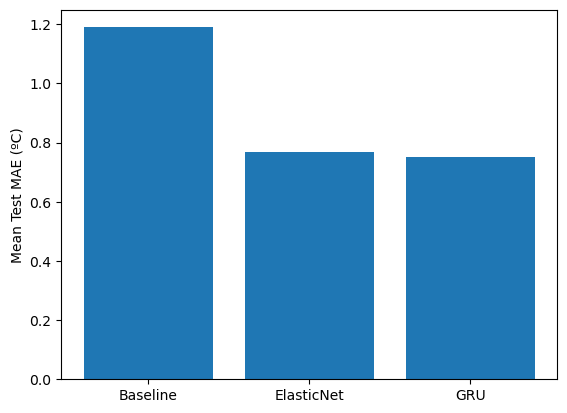

In [61]:
import matplotlib.pyplot as plt

model_names = ['Baseline', 'ElasticNet', 'GRU']

x = range(len(model_names))
plt.bar(x, [1.19, 0.77, 0.75])
plt.xticks(x, model_names)
plt.ylabel('Mean Test MAE (ºC)')
plt.show()

# Predicting 7 days in advance

Simple example.

In [224]:
df.loc[:, 'target'] = df['MedTemp'].shift(-7).values
df = df.dropna()
df.shape

(3315, 102)

In [225]:
X = df.drop(['Date', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [226]:
# Create TimeSeriesSplit object, add a gap of 7 days for not using future data
tscv = TimeSeriesSplit(n_splits=10, test_size=7, max_train_size=365, gap=7)

In [227]:
# Models to try in each cross-validation split
models = [
    RandomForestRegressor(max_depth=10, n_jobs=-1),
    RandomForestRegressor(max_depth=20, n_jobs=-1),
    RandomForestRegressor(max_depth=None, n_jobs=-1),
]

train_maes, valid_maes = custom_cv_ts(df, models, X_train, y_train, cv=tscv)

Train dates: 2014-06-02 - 2015-06-01
Train MAE: 0.57
Validation dates: 2015-06-09 - 2015-06-15
Validation MAE: 1.93

Train dates: 2014-06-09 - 2015-06-08
Train MAE: 0.54
Validation dates: 2015-06-16 - 2015-06-22
Validation MAE: 0.95

Train dates: 2014-06-16 - 2015-06-15
Train MAE: 0.56
Validation dates: 2015-06-23 - 2015-06-29
Validation MAE: 2.48

Train dates: 2014-06-23 - 2015-06-22
Train MAE: 0.55
Validation dates: 2015-06-30 - 2015-07-06
Validation MAE: 1.95

Train dates: 2014-06-30 - 2015-06-29
Train MAE: 0.56
Validation dates: 2015-07-07 - 2015-07-13
Validation MAE: 3.25

Train dates: 2014-07-07 - 2015-07-06
Train MAE: 0.56
Validation dates: 2015-07-14 - 2015-07-20
Validation MAE: 1.05

Train dates: 2014-07-14 - 2015-07-13
Train MAE: 0.58
Validation dates: 2015-07-21 - 2015-07-27
Validation MAE: 1.74

Train dates: 2014-07-21 - 2015-07-20
Train MAE: 0.56
Validation dates: 2015-07-28 - 2015-08-03
Validation MAE: 1.6

Train dates: 2014-07-28 - 2015-07-27
Train MAE: 0.57
Validation d

In [228]:
print('Mean train MAE:', train_maes.mean().round(2), 'ºC')
print('Mean validation MAE:', valid_maes.mean().round(2), 'ºC')

Mean train MAE: 0.56 ºC
Mean validation MAE: 1.82 ºC


What about feature importances?

In [229]:
rf = RandomForestRegressor(max_depth=20, n_jobs=-1)
rf.fit(X_train, y_train)

pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

,feature,importance
48,MinTemp_rolling_avg_10,0.248093
64,MedTemp_rolling_avg_10,0.167556
12,Day_of_year,0.110779
50,MinTemp_rolling_avg_15,0.077615
66,MedTemp_rolling_avg_15,0.067720
58,MaxTemp_rolling_avg_15,0.026426
62,MedTemp_rolling_avg_5,0.012572
56,MaxTemp_rolling_avg_10,0.011746
9,Temp9am,0.008100
60,MedTemp_rolling_avg_3,0.007181
